# TEDx Talks Brazilian Accents dataset

The following is a data visualisation of main features of the TEDx Talks Brazilian Accents (TTBAcc) dataset.

In [2]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_theme(style="ticks", font_scale=2)

DATAPATH = pathlib.PosixPath("~/Dev/datasets/ttbacc/ttbacc-br-valid.tsv").expanduser()

First, we load the dataset and take a look at the extracted infomation

In [3]:
ttbacc = pd.read_csv(DATAPATH, sep="\t")
ttbacc.head()

url  \
0  https://www.youtube.com/watch?v=IUBHxWB2TFE   
1  https://www.youtube.com/watch?v=RRKYZeK371U   
2  https://www.youtube.com/watch?v=R92VizxVgOg   
3  https://www.youtube.com/watch?v=oaQaW1DOwpQ   
4  https://www.youtube.com/watch?v=ezEucg_UkcQ   

                                               title           speaker   age  \
0                          nossa cidade é nossa casa   mila d'oliveira   NaN   
1           que nudez é essa? - what nudity is this?   clarice niskier  62.0   
2  conexões que transformam - connections that tr...  henrique saraiva  42.0   
3   um grito, muitas vozes - one scream, many voices   humberto baltar  41.0   
4     vulnerável e reativo - vulnerable and reactive    elisama santos   NaN   

  gender          fname ed_level state              city  birthplace  valid  \
0      F  ted-talk-0009      SUP    BA          Salvador        True   True   
1      F  ted-talk-0010      SUP    RJ    Rio de janeiro        True   True   
2      M  ted-talk-0011      SUP    RJ    Rio de janeiro        True   True   
3      M  ted-talk-0012      SUP    RJ    Rio de janeiro        True   True   
4      F  ted-talk-0013      SUP    BA  Feira de santana        True   True   

  caption  length  
0   pt-BR     742  
1    a.pt     811  
2    a.pt    1085  
3    a.pt     914  
4    a.pt    1036

There are information about the URL (`url`) to the source video, the video title (`title`), name of the speaker (`speaker`), the age of the speaker, its gender, educational level (`ed_level`), and the state. The column `birthplace` indicates whether or not `state` is where the speaker was born. The `city` holds a more precise location of where he was born. The `valid` field, when `True` means that sample has a single speaker, without musical instruments, no conversation, and that was validated manually. Finally, `caption` tells when that sample has a AI-generated caption (`a.pt`) or human caption (`pt-BR`), and the `length` is how many seconds there is in that sample.

Following, we visualize a heatmap of the `length` against the `state`.

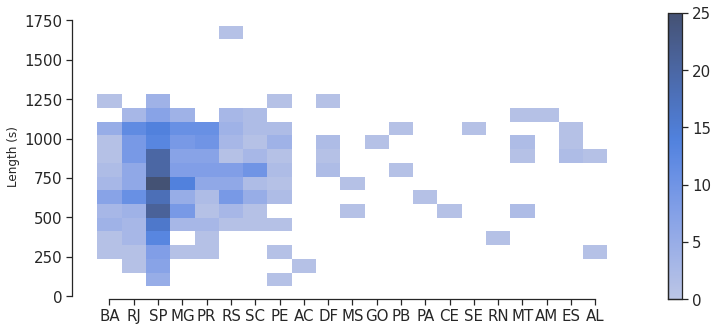

In [4]:
sns.set_theme(style="ticks", palette="muted", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
fct = sns.displot(
    data=ttbacc,
    y="length",
    x="state",
    aspect=2.2,
    cbar=True,
)
fct.set_axis_labels("", "Length (s)")
fct.despine(trim=True)
plt.savefig("../imgs/length-state.pdf", dpi=300, transparent=True)

The heatmap shows that most of the speech data is concentrated at the region of *São Paulo*. Therefore, most of the data is from the *Paulistano* accent.

Now, let's take a look at how old are the speakers, while also considering the `gender` and the `region` of them.

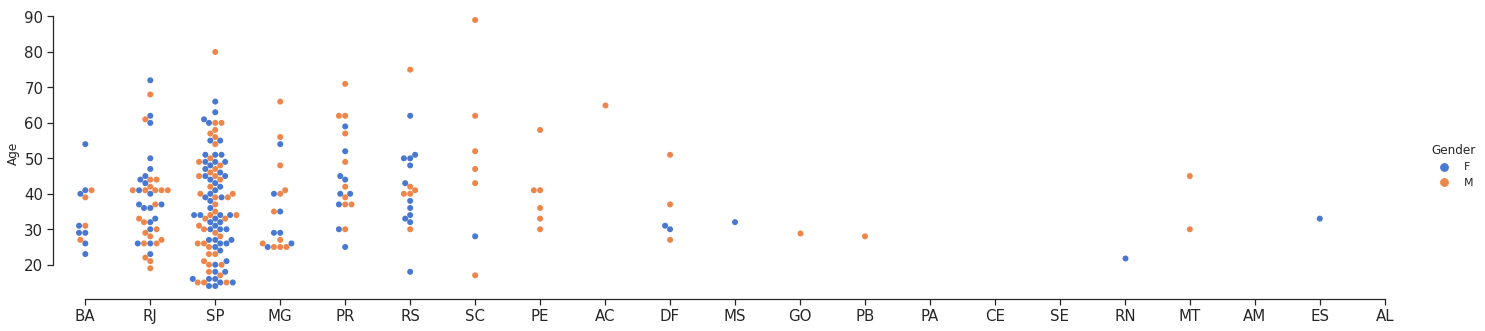

In [5]:
sns.set_theme(style="ticks", palette="muted", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
fct = sns.catplot(
    data=ttbacc,
    x="state",
    y="age",
    hue="gender",
    aspect=4,
    s=6,
    kind="swarm",
)
fct.legend.set(title="Gender")
fct.set_axis_labels("", "Age")
fct.despine(trim=True)

Each point represents a single **sample**; thus, there might be overlapping speakers with more than one sample. Although SP is well distributed with speakers from most age intervals, the whole data has much more speakers from 20 to 40 years. The gender remains very well distributed, except for regions which have scarce data (e.g. RN, MT, ES,...)

Still looking at gender distribution, but now looking more closely to the sample count per state, we can make a stacked barplot.

[None]

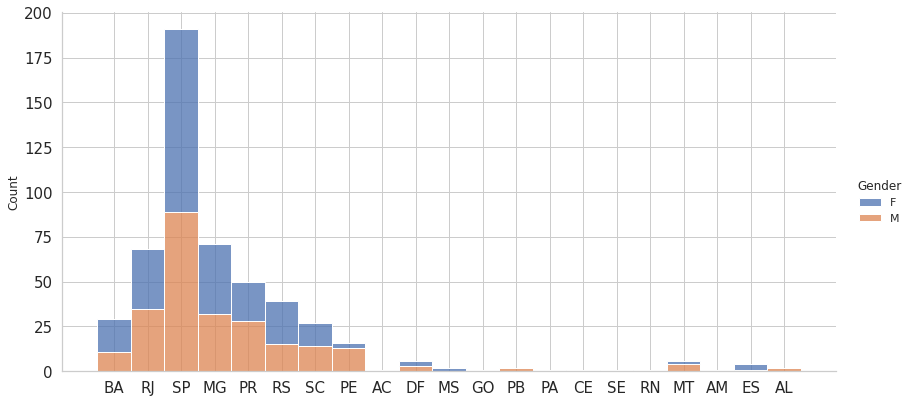

In [6]:
sns.set_theme(style="whitegrid", palette="deep", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
fct = sns.displot(
    data=ttbacc,
    x="state",
    hue="gender",
    aspect=2,
    height=6,
    multiple="stack",
)
fct.set_axis_labels("", "Count")
fct.legend.set(title="Gender")

Now, similarly to the swarmplot, we can check the age distribution per gender. This is usefull for future analysis, since it shows where our data is mostly concentrated regarding age it allows us to define a better sample of the dataset without drastic age variation.

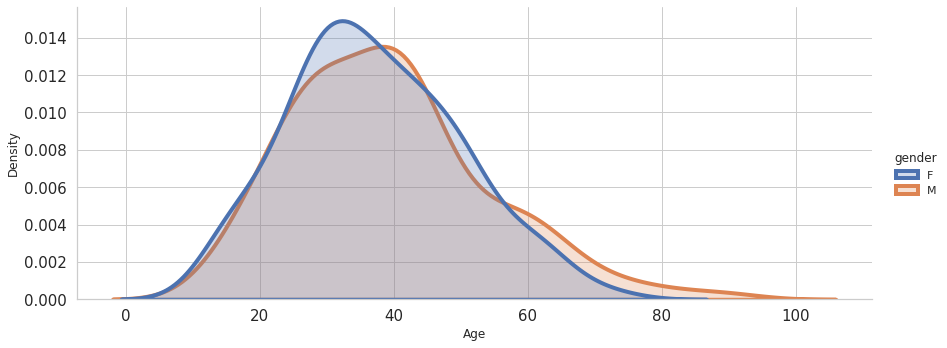

In [34]:
sns.set_theme(style="whitegrid", palette="deep", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
fct = sns.displot(
    data=ttbacc,
    x="age",
    hue="gender",
    aspect=2.5,
    kind="kde",
    fill=True,
    lw=4,
    bw_adjust=1,
)
fct.set_axis_labels("Age", "Density")
plt.savefig("../imgs/age-gender.pdf", dpi=300)

We can also see that most of the speakers have a high level of education, while one speaker at higher ages has completed only the high school. Young speakers are either at middle school or high school. Overall, the dataset has mainly educated speakers, due to the TEDx Talks environment.

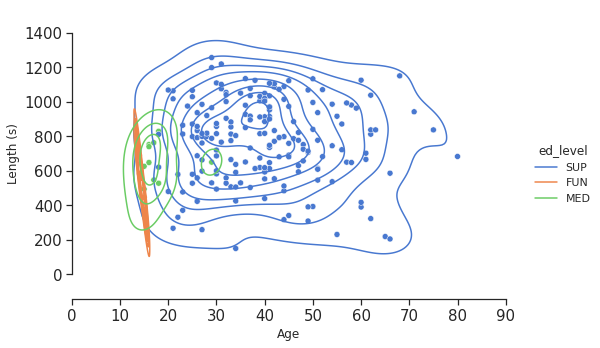

In [143]:
sns.set_theme(style="ticks", palette="muted", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
fct = sns.displot(
    data=ttbacc,
    x="age",
    y="length",
    aspect=1.5,
    kind="kde",
    hue="ed_level",
    facet_kws={"xlim": (0, 90)},
)
sns.scatterplot(
    data=ttbacc,
    x="age",
    y="length",
    hue="ed_level",
    legend=False,
)
fct.despine(trim=True)
fct.set_axis_labels("Age", "Length (s)")
plt.savefig("../imgs/age-length.pdf", dpi=300, transparent=True)

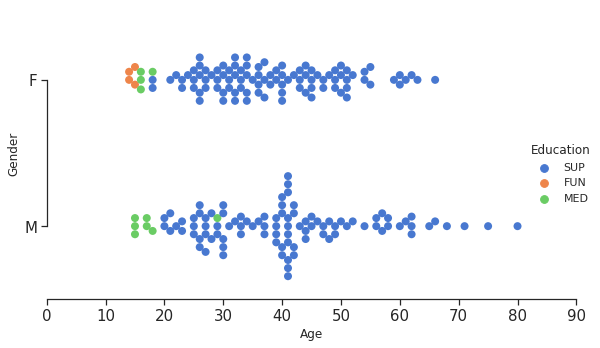

In [10]:
sns.set_theme(style="ticks", palette="muted", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
fct = sns.catplot(
    data=ttbacc,
    kind="swarm",
    y="gender",
    x="age",
    hue="ed_level",
    aspect=1.5,
    s=8,
)
fct.set(ylabel="Gender", xlabel="Age", xlim=(0, 90))
fct.despine(trim=True)
fct.legend.set(title="Education")
plt.tight_layout()
plt.savefig("../imgs/ed-dist.pdf", dpi=300, transparent=True)

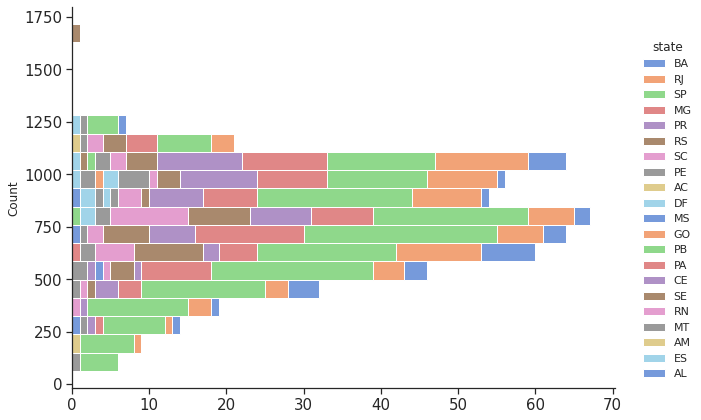

In [102]:
sns.set_theme(style="ticks", palette="muted", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
g = sns.displot(
    data=ttbacc,
    y="length",
    hue="state",
    aspect=1.5,
    height=6,
    multiple="stack",
    palette="muted",
)
g.set_axis_labels("", "Count")
g.tight_layout()

Finally, we can make a plot of the demographic information in the dataset that is missing. The `age`, `city`, `ed_level` and the `caption` are used here. The chart that the caption was mostly present in our data, either produced by humans or AI. Therefore, most of the data is also transcribed.

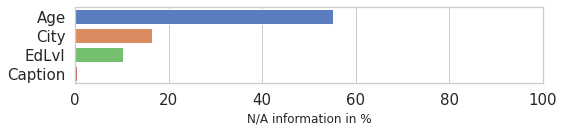

In [187]:
labels = ["Age", "City", "EdLvl", "Caption"]
values = [
    ttbacc["age"].isna().sum() / len(ttbacc.index) * 100,
    ttbacc["city"].isna().sum() / len(ttbacc.index) * 100,
    ttbacc["ed_level"].isna().sum() / len(ttbacc.index) * 100,
    ttbacc["caption"].isna().sum() / len(ttbacc.index) * 100,
]


sns.set_theme(style="whitegrid", palette="muted", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 2)})
ax = sns.barplot(
    y=labels,
    x=values,
    orient="h",
)
ax.set_xlim((0, 100))
ax.set_xlabel("N/A information in %")
plt.tight_layout()
plt.savefig("../imgs/missing-data.pdf", dpi=300, transparent=True)